# PRÁTICA INDEPENDENTE: kNN.

## Introdução

#### A partir do dataset `wdbc`, construir um classificador baseado em kNN. Ele contém uma série de features que foram computadas a partir de imagens digitalizadas de amostras de tecido mamário. Os atributos descrevem características dos núcleos celulares nas imagens. 

#### As features são as seguintes:

* ID number 
* Diagnosis (M = malignant, B = benign) 

#### Dez features computadas sobre cada núcleo celular (dando origem a 30 features -uma por núcleo-)

* radius (mean of distances from center to points on the perimeter) 
* texture (standard deviation of gray-scale values) 
* perimeter 
* area 
* smoothness (local variation in radius lengths) 
* compactness ($\frac{perimeter^{2}}{area} - 1.0$) 
* concavity (severity of concave portions of the contour) 
* concave points (number of concave portions of the contour) 
* symmetry 
* fractal dimension ("coastline approximation" - 1)

#### Exercício 1: Importar as bibliotecas necessárias.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

#### Exercício 2. Ler o dataset a partir do arquivo "wdbc.data" em anexo e realizar ums inspeção inicial nos dados.

In [10]:
df= pd.read_csv('wdbc.data', header= None)

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [16]:
df.columns= ['id', 'diagnosis', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
             16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

In [17]:
#Balanceamento das classes
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#### Exercício 3: Fazer o split entre os atributos descritivos e o target.

In [20]:
#Variáveis preditoras
preditoras= list(df.columns)
preditoras.remove('id')
preditoras.remove('diagnosis')
X= df[preditoras]

print(X[:2])

      1      2      3       4        5        6       7        8       9   \
0  17.99  10.38  122.8  1001.0  0.11840  0.27760  0.3001  0.14710  0.2419   
1  20.57  17.77  132.9  1326.0  0.08474  0.07864  0.0869  0.07017  0.1812   

        10  ...     21     22     23      24      25      26      27      28  \
0  0.07871  ...  25.38  17.33  184.6  2019.0  0.1622  0.6656  0.7119  0.2654   
1  0.05667  ...  24.99  23.41  158.8  1956.0  0.1238  0.1866  0.2416  0.1860   

       29       30  
0  0.4601  0.11890  
1  0.2750  0.08902  

[2 rows x 30 columns]


In [26]:
#Padronização das medidas dos atributos
X = preprocessing.scale(X, 
                        axis = 0
                       )
print(X[:2])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]]


In [27]:
#Vetor com variável resposta
le = preprocessing.LabelEncoder()
y = le.fit_transform(df['diagnosis']) #Processamento de categóricas
y
print(y[:5])

[1 1 1 1 1]


#### Exercício 4. Fazer o split entre `test` e `training`.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

#### Exercício 5: Definir o parâmetro k em 3.

In [29]:
model = KNeighborsClassifier(n_neighbors = 3)

In [30]:
# Ajustá-lo sobre os dados de treinamento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

#### Exercício 6: Avaliar o desempenho do modelo em termos de `score`.

In [44]:
model.score(X_test, y_test)

0.958041958041958

#### Exercício 7: Fazer a previsão do conjunto de testing.

In [45]:
# Predições nos dados de TESTE
y_pred = model.predict(X_test)

#### Exercício 8: Usar uma matriz de confusão para observar os acertos e erros na classificação.

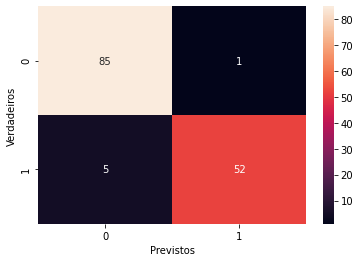

In [49]:
sns.heatmap(confusion_matrix(y_test, 
                             y_pred
                            ),
            annot = True
           )
plt.ylabel('Verdadeiros')
plt.xlabel('Previstos');

#### Exercício 9: Encontre o melhor k para o modelo e refaça suas previsões.

Importamos o método `cross_val_score` do módulo `model_selection` do `sklearn` .

In [51]:
# Calcular os scores de validação cruzada sobre os recursos já padronizados

scores_para_df_standar = []

error_rates = {}

for i in range(1, 100, 5):
    
    model = KNeighborsClassifier(n_neighbors = i)
    
    cv_scores = cross_val_score(model, 
                                X, 
                                y, 
                                cv = 5
                               )
    
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores),
                      'n_neighbours':i
                     }
    scores_para_df_standar.append(dict_row_score)
    
    error = 1 - np.mean(cross_val_score(model, 
                                        X, 
                                        y, 
                                        cv = 5
                                       )
                       )
    error_rates.update({i:error})

In [52]:
#Dataframe com os Scores medios e os desvios padrão de scores para cada número de K testado
df_scores_standar = pd.DataFrame(scores_para_df_standar)
df_scores_standar

,score_medio,score_std,n_neighbours
0,0.950769,0.016353,1
1,0.968359,0.013146,6
2,0.963111,0.020285,11
3,0.957833,0.011600,16
4,0.952569,0.016223,21
5,0.954339,0.017841,26
6,0.952585,0.019643,31
7,0.954324,0.015049,36
8,0.954324,0.015049,41
9,0.956094,0.016595,46


In [55]:
# erros de cada numero de K calculado (quanto mais próximo de zero, melhor)
error_rates

{1: 0.04923148579413128,
 6: 0.03164104952647118,
 11: 0.03688868188169536,
 16: 0.04216736531594467,
 21: 0.04743052321068153,
 26: 0.04566061170625679,
 31: 0.04741499767116897,
 36: 0.04567613724576913,
 41: 0.04567613724576913,
 46: 0.04390622574134451,
 51: 0.04741499767116897,
 56: 0.05092376960099365,
 61: 0.0509392951405061,
 66: 0.05620245303524318,
 71: 0.05795683900015525,
 76: 0.05971122496506742,
 81: 0.06146561092997982,
 86: 0.06497438285980439,
 91: 0.06672876882471679,
 96: 0.0702530662940537}

In [56]:
#Número de K com o menor erro
kBest = min(error_rates, key = error_rates.get)
kBest

6

In [57]:
#Instanciando novamente o modelo com melhor valor para K
model = KNeighborsClassifier(n_neighbors = kBest)

In [58]:
# Ajustá-lo sobre os dados de treinamento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [59]:
# Predições nos dados de TESTE agora com K otimizado
y_pred = model.predict(X_test)

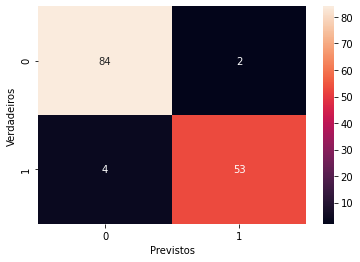

In [60]:
#Matriz de confusão

sns.heatmap(confusion_matrix(y_test, 
                             y_pred
                            ),
            annot = True
           )
plt.ylabel('Verdadeiros')
plt.xlabel('Previstos');

Vemos que além de errar menos o modelo distribui os seus erros de uma forma que pensando na natureza do problema me parecer fazer mais sentido.

Sem o K otimizado ele havia errado o mesmo número de vezes, porém com uma quantidade diferente em cada classe. Havia indicado que 1 pessoa tinha cancer quando na verdade não tinha e havia indicado que 5 não tinha quando na verdade tinham. No modelo com o K otimizado ele errou um a mais no primeiro caso e um a menos no segundo.

Neste caso, este parece ser um erro menos prejudicial. Explico: no caso de errar menos quem estava de fato com câncer, o modelo está evitando que uma pessoa descubra que tenha câncer em um estágio mais avançado e com menor probabilidade de efeitos positivos do tratamento, isto é, probabilidade de cura;

Quando ele diz que alguém está com câncer e na verdade esta pessoa não está, o maior dano seria a pessoa fazer o tratamento, mas sem o risco de perder sua vida (já que não tem câncer) como no primeiro tipo de erro.